In [3]:
# basic IV test routine for single point single dot

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
import dot_classifier
reload(dot_classifier)
import dot_classifier_tf
reload(dot_classifier_tf)
import thomas_fermi
reload(thomas_fermi)
import markov_graph
reload(markov_graph)
import potential_profile
reload(potential_profile)
import tunneling
reload(tunneling)
import rank_nullspace
reload(rank_nullspace)
%pdb

import time
st = time.time()
N_v_points = 100
V_d_vec = np.linspace(310e-3,290e-3,N_v_points)
I_vec = np.zeros(N_v_points)

N_grid= 100
x = np.linspace(-1,1,N_grid)
K = thomas_fermi.create_K_matrix(x,E_scale=0.5e-3,sigma= (x[1] - x[0]))

battery_ind = []
max_prob_node = []
max_prob_dist = []

for i in range(N_v_points):
    if (i % 10 == 0):
        print i
    
    d = (V_d_vec[i],0,0.1,1)
    b1 = (-200e-3,0.3,0.1,1)
    b2 = (-200e-3,-0.3,0.1,1)

    V = potential_profile.single_dot_V_x_wire(x,d,b1,b2)                       
    mu_l = (0.1,0.1+0.001)
    
    graph_model = (25,1)
    battery_weight = 200
    kT = 400e-6
    physics = (x,V,K,mu_l,battery_weight,kT)

   
    if(i==0):
        G = markov_graph.generate_graph(graph_model, physics)
        battery_ind = markov_graph.get_battery_nodes(G)
        max_prob_node_trial  = markov_graph.get_max_prob_node(G)[0][1]
        graph_model = (max_prob_node_trial,1)
        print graph_model
        G = markov_graph.generate_graph(graph_model, physics)
        battery_ind = markov_graph.get_battery_nodes(G)
    else:
        G = markov_graph.recalculate_weights(G,physics)  
    I_vec[i] = markov_graph.get_current(G,battery_ind)
    max_prob_node += [markov_graph.get_max_prob_node(G)[0]]
    max_prob_dist += [markov_graph.get_max_prob_node(G)[1]]

print time.time()-st

Automatic pdb calling has been turned ON
0
(16, 1)
10
20
30
40
50
60
70
80
90
74.5891411304


/Users/ssk4/anaconda/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/ssk4/anaconda/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/ssk4/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/ssk4/anaconda/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprec

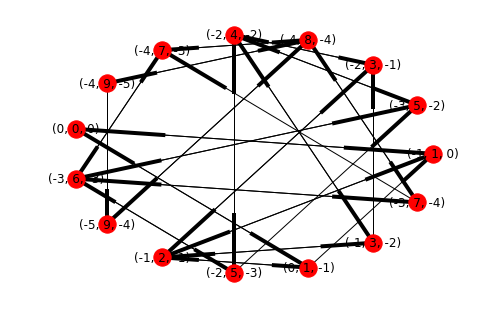

In [22]:
nx.draw_shell(G,with_labels=True)

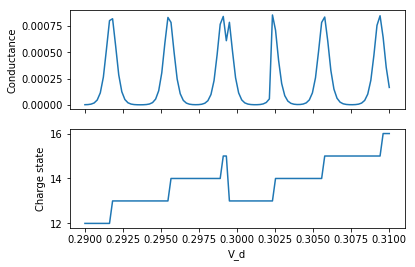

In [70]:
fig,axarr = plt.subplots(2,sharex=True)
axarr[0].plot(V_d_vec,I_vec)
axarr[0].set_ylabel('Conductance')
max_prob_node = np.array(max_prob_node)
axarr[1].plot(V_d_vec,max_prob_node[:,1])
axarr[1].set_xlabel('V_d')
axarr[1].set_ylabel('Charge state')

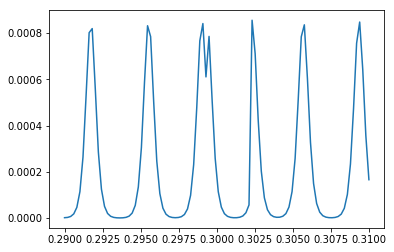

In [71]:
plt.plot(V_d_vec,I_vec)

[array([4]),
 array([5]),
 array([5]),
 array([5]),
 array([5]),
 array([5]),
 array([5]),
 array([5]),
 array([5]),
 array([16]),
 array([16]),
 array([5]),
 array([4]),
 array([6]),
 array([4])]

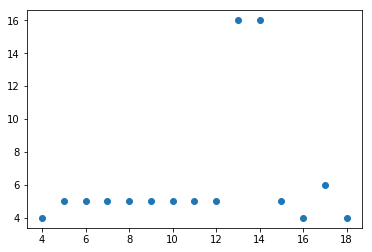

In [68]:

size = []
n_start = 4
n_end = 19
for i in range(n_start,n_end,1):
    plt_ind = np.argwhere(max_prob_node[:,1] == i)
    size += [plt_ind[-1] - plt_ind[0]]
    
plt.plot(range(n_start,n_end,1),size,'o')
size

In [276]:
data = []
for i in range(len(V_d_vec)):
    data += [[V_d_vec[i],I_vec[i],max_prob_node[i,1]]]
    
data = np.array(data)-
np.savetxt('/Users/ssk4/quantum-ml/ndot/ml/data/single_dot.txt',data)

SyntaxError: invalid syntax (<ipython-input-276-b7dcdf41a9cd>, line 5)

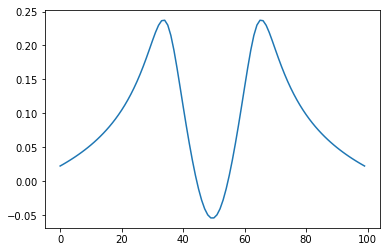

In [277]:
plt.plot(V)

In [76]:
XX,YY = np.meshgrid(np.array(G.nodes())[:,1],V_d_vec)

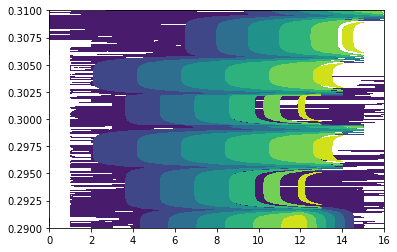

In [122]:
plt.contourf(XX,YY,np.real(np.array(max_prob_dist).reshape((N_v_points,np.array(max_prob_dist).shape[1]))),\
          )

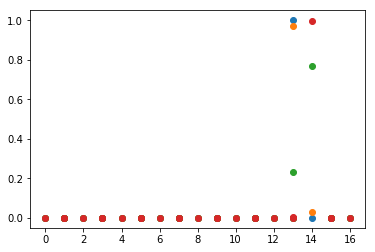

In [135]:
for i in range(80,60,-5):
    plt.plot(np.array(G.nodes())[:,1],max_prob_dist[i],'o')

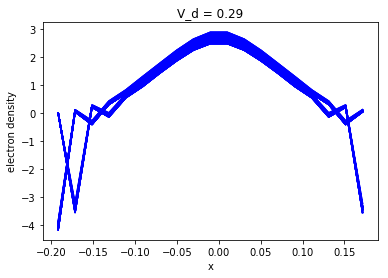

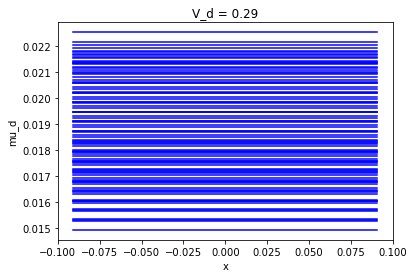

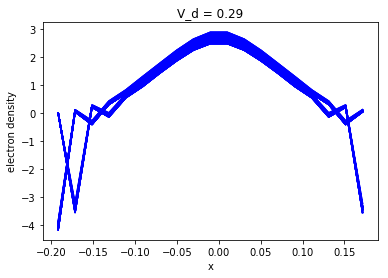

In [147]:
import dot_classifier
reload(dot_classifier)
import dot_classifier_tf
reload(dot_classifier_tf)
import thomas_fermi
reload(thomas_fermi)
import markov_graph
reload(markov_graph)
import potential_profile
reload(potential_profile)
import tunneling
reload(tunneling)
import rank_nullspace
reload(rank_nullspace)
from IPython import display
%pdb

import time
st = time.time()
N_v_points = 100
V_d_vec = np.linspace(310e-3,290e-3,N_v_points)

N_grid= 100
x = np.linspace(-1,1,N_grid)
K = thomas_fermi.create_K_matrix(x,E_scale=0.5e-3,sigma= (x[1] - x[0]))

for i in range(N_v_points):
    if (i % 10 == 0):
        print i
    
    d = (V_d_vec[i],0,0.1,1)
    b1 = (-200e-3,0.3,0.1,1)
    b2 = (-200e-3,-0.3,0.1,1)

    V = potential_profile.single_dot_V_x_wire(x,d,b1,b2)                       
    mu_l = (0.1,0.1+0.001)
    
    n,mu = thomas_fermi.solve_thomas_fermi(x,V,K,mu_l,max_prob_node[i][1:-1])
    
    mask = dot_classifier.get_mask(x,V,K,mu_l[0])
    dot_info = dot_classifier.get_dot_info(mask)
    print dot_info
    
    plt.figure(1)
    plt.plot(x[45:55],mu[45:55],'b')
    plt.xlabel('x')
    plt.ylabel('mu_d')
    plt.title('V_d = ' + str(V_d_vec[i]))
    
    plt.figure(2)
    plt.plot(x[40:59],n[40:59],'b')
    plt.xlabel('x')
    plt.ylabel('electron density')
    plt.title('V_d = ' + str(V_d_vec[i]))
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.5)
    
   
    